In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats
import scipy

In [106]:
sns.set()

In [107]:
data = pd.read_csv(r'C:\Users\Mateusz\Documents\Studia\WNE\Ekonometria WNE\Case\Do kejsu 3\dataset.csv', index_col=0)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, Guatemala to Singapore
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Crime          114 non-null    float64
 1   Alco           114 non-null    float64
 2   Unemployment   114 non-null    float64
 3   GDPpc          114 non-null    float64
 4   Death          114 non-null    int64  
 5   gun            114 non-null    int64  
 6   Continent      114 non-null    object 
 7   Asia           114 non-null    int64  
 8   South_America  114 non-null    int64  
 9   North_America  114 non-null    int64  
 10  Europe         114 non-null    int64  
 11  Africa         114 non-null    int64  
 12  Oceania        114 non-null    int64  
 13  pop            114 non-null    int64  
 14  log(crime)     114 non-null    float64
 15  EDU            114 non-null    float64
 16  EDUU           114 non-null    float64
dtypes: float64(7), int64(9), object(1)
memory usa

In [109]:
variables = [['Crime', 'Crime rate', 'continuous'],
          ['Alco', 'Average alcohol consumption','continuous'],
          ['Unemployment', 'Unemployment rate','continuous'],
          ['GDPpc', 'Gross Domestic Product per capita','continuous'],
          ['Death', 'Death Penalty (0/1)','binary'],
          ['gun', 'Does access to weapons not require a permit? (0/1)','binary'],
          ['Continent', 'Names of continents','binary'],
          ['pop', 'Population','continuous'],
          ['log(crime)', 'logarythm of variable Crime', 'continuous'],
           ['EDU', 'Education level index','continuous'],
          ['EDUU', 'Inverse of the variable EDU (1/EDU)', 'continuous']]

x = pd.DataFrame(variables, columns=['Variables', 'Variable explanation', 'Type of variable'])  # git
x

,Variables,Variable explanation,Type of variable
0,Crime,Crime rate,continuous
1,Alco,Average alcohol consumption,continuous
2,Unemployment,Unemployment rate,continuous
3,GDPpc,Gross Domestic Product per capita,continuous
4,Death,Death Penalty (0/1),binary
5,gun,Does access to weapons not require a permit? (...,binary
6,Continent,Names of continents,binary
7,pop,Population,continuous
8,log(crime),logarythm of variable Crime,continuous
9,EDU,Education level index,continuous


In [103]:
data.describe()

,Crime,Alco,Unemployment,GDPpc,Death,gun,Asia,South_America,North_America,Europe,Africa,Oceania,pop,log(crime),EDU,EDUU
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,1.140000e+02,114.000000,114.000000,114.000000
mean,46.517544,5.312061,7.709904,16862.152444,0.342105,0.052632,0.280702,0.078947,0.114035,0.315789,0.175439,0.035088,5.173189e+07,3.780716,0.692904,1.532566
std,15.501131,3.876764,5.337003,21127.603142,0.476509,0.224283,0.451326,0.270847,0.319257,0.466882,0.382021,0.184814,1.788659e+08,0.354958,0.154499,0.421210
min,17.590000,0.002000,0.170000,482.639066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.853240e+05,2.867331,0.327000,1.070664
25%,35.155000,1.685000,4.299750,3307.752382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.219540e+06,3.559758,0.563750,1.233819
50%,44.695000,4.855000,6.177500,6986.907291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.031988e+07,3.799837,0.711500,1.405488
75%,57.442500,8.330000,9.897750,22331.302827,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.534510e+07,4.050768,0.810500,1.773887
max,79.340000,16.700000,25.156000,107638.212300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.371220e+09,4.373742,0.934000,3.058104


### 2.4. Proces selekcji zmiennych objaśniających do modelu

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

### Pierwotna wersja modelu

In [14]:
m1 = 'np.log(Crime) ~ Unemployment + Alco + EDU + EDUU + np.log(pop) + C(Death) + C(gun) + C(Asia)+C(South_America) + C(North_America) + C(Africa) + C(Oceania)'
m1 = smf.ols(m1, data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Crime)   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     6.985
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           4.41e-09
Time:                        18:26:02   Log-Likelihood:                -8.7374
No. Observations:                 114   AIC:                             43.47
Df Residuals:                     101   BIC:                             79.05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.8534      0.934      6.267      0.000       4.001       7.706
C(Death)[T.1]             0.0323      0.066      0.490      0.625      -0.098       0.163
C(gun)[T.1]              -0.0463      0.137     -0.338      0.736      -0.318       0.225
C(Asia)[T.1]             -0.0491      0.127     -0.385      0.701      -0.302       0.204
C(South_America)[T.1]     0.3082      0.124      2.494      0.014       0.063       0.553
C(North_America)[T.1]     0.2991      0.119      2.512      0.014       0.063       0.535
C(Africa)[T.1]            0.0462      0.120      0.384      0.702      -0.193       0.285
C(Oceania)[T.1]           0.3599      0.158      2.283      0.025       0.047       0.672
Unemployment              0.0111      0.006      1.927      0.057      -0.000       0.022
Alco                     -0.0010      0.012     -0.085      0.933      -0.024       0.022
EDU                      -2.5741      0.757     -3.401      0.001      -4.076      -1.073
EDUU                     -0.6110      0.251     -2.438      0.017      -1.108      -0.114
np.log(pop)               0.0304      0.018      1.722      0.088      -0.005       0.065
==============================================================================
Omnibus:                       15.568   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.209
Skew:                          -0.679   Prob(JB):                     1.50e-05
Kurtosis:                       4.682   Cond. No.                         889.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testowanie hipotez złożonych

In [20]:
hip1 = '(Alco = 0)'

f_test1 = m1.f_test(hip1)
f_test1

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.00717684]]), p=0.93265467220455, df_denom=101, df_num=1>

Liczymy statystykę testową zmiennej Alco oraz jej p-value. Statystyka testowa nie zawiera się w obszarze krytycznym
a p-value zmiennej jest większe od poziomu istotności 0.05, więc usuwamy tą zmienną z modelu.

### 2 wersja modelu - Usuwam zmienną Alco

In [17]:
m2 = 'np.log(Crime) ~ Unemployment + EDU + EDUU + np.log(pop) + C(Death) + C(gun) + C(Asia)+C(South_America) + C(North_America) + C(Africa) + C(Oceania)'
m2 = smf.ols(m2, data).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Crime)   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     7.694
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.53e-09
Time:                        18:27:09   Log-Likelihood:                -8.7414
No. Observations:                 114   AIC:                             41.48
Df Residuals:                     102   BIC:                             74.32
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.8546      0.929      6.300      0.000       4.011       7.698
C(Death)[T.1]             0.0326      0.065      0.498      0.620      -0.097       0.162
C(gun)[T.1]              -0.0442      0.134     -0.330      0.742      -0.310       0.222
C(Asia)[T.1]             -0.0432      0.106     -0.407      0.685      -0.253       0.167
C(South_America)[T.1]     0.3106      0.119      2.600      0.011       0.074       0.548
C(North_America)[T.1]     0.3014      0.115      2.612      0.010       0.073       0.530
C(Africa)[T.1]            0.0492      0.114      0.431      0.667      -0.177       0.276
C(Oceania)[T.1]           0.3635      0.151      2.411      0.018       0.065       0.663
Unemployment              0.0112      0.006      1.997      0.049    7.41e-05       0.022
EDU                      -2.5838      0.745     -3.470      0.001      -4.061      -1.107
EDUU                     -0.6113      0.249     -2.451      0.016      -1.106      -0.117
np.log(pop)               0.0302      0.017      1.734      0.086      -0.004       0.065
==============================================================================
Omnibus:                       15.750   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.516
Skew:                          -0.686   Prob(JB):                     1.29e-05
Kurtosis:                       4.691   Cond. No.                         851.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
hip2 = '(Alco = 0), (C(gun)[T.1] = 0)'

f_test2 = m1.f_test(hip2)
f_test2

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.05746945]]), p=0.9441815804287691, df_denom=101, df_num=2>

Kolejnym kandydatem do usunięcia jest zmienna gun - obrazująca czy w danym państwie broń jest ogólnodostępna - ponieważ jej p-value jest największe ze wszystkich pozostałych zmiennych. Liczymy statystykę testową w celu przetestowania hipotezy zerowej o łącznej nieistotności zmiennych. P-value statystyki testowej jest większe od 0.05, więc nie mamy podstaw do odrzucenia hipotezy zerowej - zmienne są łącznie nieistotne.

### 3 wersja modelu - Usuwam zmienną Alco

In [22]:
m3 = 'np.log(Crime) ~ Unemployment + EDU + EDUU + np.log(pop) + C(Death) + C(Asia)+C(South_America) + C(North_America) + C(Africa) + C(Oceania)'
m3 = smf.ols(m3, data).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Crime)   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     8.527
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           5.30e-10
Time:                        18:28:09   Log-Likelihood:                -8.8022
No. Observations:                 114   AIC:                             39.60
Df Residuals:                     103   BIC:                             69.70
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.8332      0.923      6.320      0.000       4.003       7.664
C(Death)[T.1]             0.0349      0.065      0.538      0.592      -0.094       0.163
C(Asia)[T.1]             -0.0364      0.104     -0.351      0.726      -0.242       0.169
C(South_America)[T.1]     0.3165      0.118      2.691      0.008       0.083       0.550
C(North_America)[T.1]     0.2937      0.113      2.610      0.010       0.071       0.517
C(Africa)[T.1]            0.0572      0.111      0.515      0.608      -0.163       0.278
C(Oceania)[T.1]           0.3682      0.149      2.464      0.015       0.072       0.665
Unemployment              0.0113      0.006      2.051      0.043       0.000       0.022
EDU                      -2.5552      0.736     -3.470      0.001      -4.015      -1.095
EDUU                     -0.6070      0.248     -2.448      0.016      -1.099      -0.115
np.log(pop)               0.0294      0.017      1.712      0.090      -0.005       0.063
==============================================================================
Omnibus:                       15.488   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.861
Skew:                          -0.681   Prob(JB):                     1.79e-05
Kurtosis:                       4.657   Cond. No.                         848.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
hip3 = '(Alco = 0), (C(gun)[T.1] = 0), (C(Asia)[T.1] =0)'

f_test3 = m1.f_test(hip3)
f_test3

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.07865386]]), p=0.9714323380122161, df_denom=101, df_num=3>

Kolejnym kandydatem do usunięcia jest zmienna Asia - 1 jeśli państwo należy do Azji, 0 w przeciwnym wypadku - ponieważ jej p-value jest największe ze wszystkich pozostałych zmiennych. Liczymy statystykę testową w celu przetestowania hipotezy zerowej o łącznej nieistotności zmiennych. P-value statystyki testowej jest większe od 0.05, więc nie mamy podstaw do odrzucenia hipotezy zerowej - zmienne są łącznie nieistotne.

### 4 wersja modelu - Usuwam zmienną "C(Asia)

In [24]:
m4 = 'np.log(Crime) ~ Unemployment + EDU + EDUU + np.log(pop) + C(Death)+C(South_America) + C(North_America) + C(Africa) + C(Oceania)'
m4 = smf.ols(m4, data).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Crime)   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9.541
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.74e-10
Time:                        18:28:51   Log-Likelihood:                -8.8704
No. Observations:                 114   AIC:                             37.74
Df Residuals:                     104   BIC:                             65.10
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.6867      0.820      6.937      0.000       4.061       7.312
C(Death)[T.1]             0.0253      0.059      0.432      0.667      -0.091       0.142
C(South_America)[T.1]     0.3385      0.099      3.413      0.001       0.142       0.535
C(North_America)[T.1]     0.3182      0.088      3.615      0.000       0.144       0.493
C(Africa)[T.1]            0.0827      0.084      0.985      0.327      -0.084       0.249
C(Oceania)[T.1]           0.3803      0.145      2.626      0.010       0.093       0.667
Unemployment              0.0120      0.005      2.288      0.024       0.002       0.022
EDU                      -2.4270      0.637     -3.812      0.000      -3.690      -1.164
EDUU                     -0.5739      0.228     -2.514      0.013      -1.027      -0.121
np.log(pop)               0.0285      0.017      1.686      0.095      -0.005       0.062
==============================================================================
Omnibus:                       16.399   Durbin-Watson:                   0.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.991
Skew:                          -0.723   Prob(JB):                     1.02e-05
Kurtosis:                       4.658   Cond. No.                         745.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
hip4 = '(Alco = 0), (C(gun)[T.1] = 0), (C(Death)[T.1] = 0), (C(Asia)[T.1] = 0)'

f_test4 = m1.f_test(hip4)
f_test4

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.10444427]]), p=0.9807199016306589, df_denom=101, df_num=4>

### 5 wersja modelu - Usuwam zmienną "C(Death)"

In [28]:
m5 = 'np.log(Crime) ~ Unemployment + EDU + EDUU + np.log(pop) + C(South_America) + C(North_America) + C(Africa) + C(Oceania)'
m5 = smf.ols(m5, data).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Crime)   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     10.79
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           5.50e-11
Time:                        18:30:39   Log-Likelihood:                -8.9727
No. Observations:                 114   AIC:                             35.95
Df Residuals:                     105   BIC:                             60.57
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.7245      0.812      7.050      0.000       4.115       7.334
C(South_America)[T.1]     0.3369      0.099      3.413      0.001       0.141       0.533
C(North_America)[T.1]     0.3194      0.088      3.645      0.000       0.146       0.493
C(Africa)[T.1]            0.0805      0.083      0.965      0.337      -0.085       0.246
C(Oceania)[T.1]           0.3727      0.143      2.603      0.011       0.089       0.657
Unemployment              0.0117      0.005      2.259      0.026       0.001       0.022
EDU                      -2.4678      0.627     -3.934      0.000      -3.711      -1.224
EDUU                     -0.5815      0.227     -2.564      0.012      -1.031      -0.132
np.log(pop)               0.0294      0.017      1.754      0.082      -0.004       0.063
==============================================================================
Omnibus:                       16.641   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.632
Skew:                          -0.727   Prob(JB):                     7.39e-06
Kurtosis:                       4.692   Cond. No.                         740.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
hip5 = '(Alco = 0), (C(gun)[T.1] = 0), (C(Death)[T.1] =0), (C(Asia)[T.1] = 0), (C(Africa)[T.1] = 0)'

f_test5 = m1.f_test(hip5)
f_test5

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.26338373]]), p=0.9320549655224923, df_denom=101, df_num=5>

Kolejnym kandydatem do usunięcia jest zmienna Africa - 1 jeśli dane państwo jest w Afryce, 0 jeśli na innym kontynencie - ponieważ jej p-value jest największe ze wszystkich pozostałych zmiennych. Liczymy statystykę testową w celu przetestowania hipotezy zerowej o łącznej nieistotności zmiennych. P-value statystyki testowej jest większe od 0.05, więc nie mamy podstaw do odrzucenia hipotezy zerowej - zmienne są łącznie nieistotne

### 6 wersja modelu - Usuwam zmienną "C(Africa)"

In [30]:
m6 = 'np.log(Crime) ~ Unemployment + EDU + EDUU + np.log(pop) + C(South_America) + C(North_America) + C(Oceania)'
m6 = smf.ols(m6, data).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Crime)   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     12.21
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           2.31e-11
Time:                        18:31:26   Log-Likelihood:                -9.4758
No. Observations:                 114   AIC:                             34.95
Df Residuals:                     106   BIC:                             56.84
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.7975      0.808      7.174      0.000       4.195       7.400
C(South_America)[T.1]     0.3215      0.097      3.301      0.001       0.128       0.515
C(North_America)[T.1]     0.2958      0.084      3.517      0.001       0.129       0.463
C(Oceania)[T.1]           0.3650      0.143      2.554      0.012       0.082       0.648
Unemployment              0.0130      0.005      2.617      0.010       0.003       0.023
EDU                      -2.5667      0.619     -4.149      0.000      -3.793      -1.340
EDUU                     -0.5788      0.227     -2.553      0.012      -1.028      -0.129
np.log(pop)               0.0293      0.017      1.753      0.083      -0.004       0.062
==============================================================================
Omnibus:                       15.050   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.804
Skew:                          -0.699   Prob(JB):                     5.01e-05
Kurtosis:                       4.489   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
hip6 = '(Alco = 0), (C(gun)[T.1] = 0), (C(Death)[T.1] =0), (C(Asia)[T.1] = 0), (C(Africa)[T.1] = 0), (np.log(pop) = 0)'

f_test6 = m1.f_test(hip6)
f_test6

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.7135775]]), p=0.6394602725613692, df_denom=101, df_num=6>

Kolejnym kandydatem do usunięcia jest zmienna log(pop) - logarytm z populacji kraju - ponieważ jej p-value jest największe ze wszystkich pozostałych zmiennych. Liczymy statystykę testową w celu przetestowania hipotezy zerowej o łącznej nieistotności zmiennych. P-value statystyki testowej jest większe od 0.05, więc nie mamy podstaw do odrzucenia hipotezy zerowej - zmienne są łącznie nieistotne

### 7 wersja modelu - Usuwam zmienną "np.log(pop)"

In [34]:
m7 = 'np.log(Crime) ~ Unemployment + EDU + EDUU + C(South_America) + C(North_America) + C(Oceania)'
m7 = smf.ols(m7, data).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Crime)   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     13.47
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           2.47e-11
Time:                        18:32:21   Log-Likelihood:                -11.104
No. Observations:                 114   AIC:                             36.21
Df Residuals:                     107   BIC:                             55.36
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.2238      0.778      7.999      0.000       4.681       7.766
C(South_America)[T.1]     0.3307      0.098      3.369      0.001       0.136       0.525
C(North_America)[T.1]     0.2703      0.084      3.232      0.002       0.104       0.436
C(Oceania)[T.1]           0.3378      0.143      2.355      0.020       0.053       0.622
Unemployment              0.0118      0.005      2.383      0.019       0.002       0.022
EDU                      -2.5591      0.625     -4.098      0.000      -3.797      -1.321
EDUU                     -0.5416      0.228     -2.377      0.019      -0.993      -0.090
==============================================================================
Omnibus:                       17.688   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.027
Skew:                          -0.773   Prob(JB):                     3.68e-06
Kurtosis:                       4.697   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

W modelu 7, na poziomie istotności 0.05 wszystkie zmienne są statystycznie istotne. Dlatego też zaprzestajemy dalszego usuwania zmiennych i poddajemy model 7 dalszej analizie.

#### Model 7 jest ostateczną wersją modelu.

### Proces selekcji modeli przedstawiony za pomocą biblioteki Stargazer

In [35]:
Stargazer([m1, m2, m3, m4, m5, m6, m7])

## 3.1 Policz współczynik korelacji rang Spearmana pomiędzy wartościami dopasowanymi oraz resztami w modelu. W weryfykacji, któego założenia KMRL wyliczony współczynnik będzie pomocny? Jakiej warotści tego współcznnika należy oczekiwać w przypadku spełnienia hipotezy zerowej tego założenia?

In [36]:
print ("\033[1m" + 'Fitted values: ' + "\033[0m", m7.fittedvalues)

print ("\033[1m" + '\nResiduals:     ' + "\033[0m" , m7.resid)

Fitted values:  Country
Guatemala       4.155741
South Africa    3.927101
Afghanistan     3.985053
Guyana          4.260775
Nigeria         3.919297
                  ...   
Qatar           3.739292
Japan           3.471489
Rwanda          3.882452
Turkmenistan    3.801147
Singapore       3.483254
Length: 114, dtype: float64

Residuals:      Country
Guatemala       0.218002
South Africa    0.435233
Afghanistan     0.363158
Guyana          0.081471
Nigeria         0.419300
                  ...   
Qatar          -0.692867
Japan          -0.463828
Rwanda         -0.929627
Turkmenistan   -0.918583
Singapore      -0.615923
Length: 114, dtype: float64


## 3.1 Korelacja Spearmana

In [37]:
from scipy.stats import spearmanr

In [38]:
coef, p_value = spearmanr(m7.fittedvalues, m7.resid)
print('Współczynnik korelacji Spearmana wynosi: %.3f' % coef)
alpha = 0.05
if p_value > alpha:
    print('Zmienne są nieskorelowane (brak podstaw do odrzucenia H0) - p_value = %.3f' % p_value)
else:
    print('Samples are correlated (reject H0) p_value = %.3f' % p_value)

Współczynnik korelacji Spearmana wynosi: -0.001
Zmienne są nieskorelowane (brak podstaw do odrzucenia H0) - p_value = 0.991


Współczynnik ten przyda się w weryfikacji założenia o braku autokorelacji składnika losowego. W takim przypadku należy spodziewać się wartości współczynnika równego 0.

## 3.2 Normalność rozkładu reszt

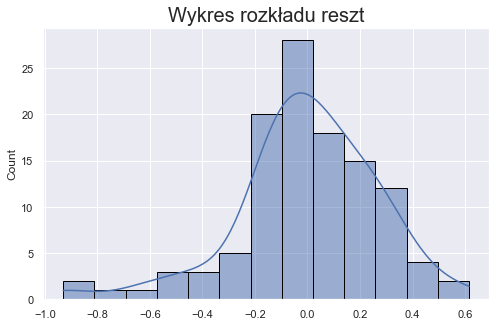

In [39]:
plt.rc('figure', figsize=(8,5))
x = sns.histplot(m7.resid, log_scale=False, kde=True, edgecolor='black')
x.set_title('Wykres rozkładu reszt', fontdict={'fontsize':20})
plt.show()

Na powyższym wykresie widzimy histogram oraz przybliżony wykres gęstości reszt modelu 7. Rozkład przypomina rozkład normalny, jednak widoczna na nim jest lekka lewostronna asymetria.

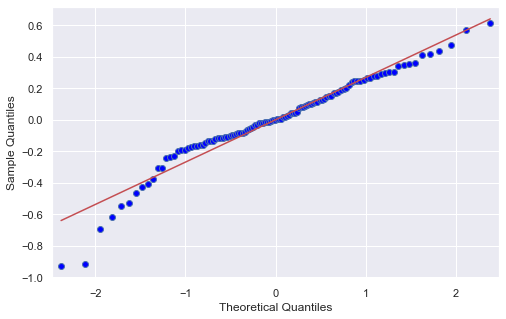

In [40]:
sm.qqplot(m7.resid, line = 'r')
plt.show()

Na powyższym wykresie widzimy wykres porównujący kwantyle rozkładu normalnego (oś X) z kwantylami reszt modelu 7 (oś Y) - kwantyle szczególnie w ogonach rozkładu się nie pokrywają. Jednak do podjęcia ostatecznej decyzji potrzebny jest odpowiedni test statystyczny - Jarque-Bera.

## 3.3 Współczynnik skośności, kurtozy i statystyki J-B dla reszt

In [42]:
import statsmodels.stats.api as sms

In [43]:
test7_1 = sms.jarque_bera(m7.resid)
test7_1
print(f'Współczynnik skośności = {test7_1[2]}')
print(f'Współczynnik kurtuozy = {test7_1[3]}')
print(f'Statystyka Jarque-Bera = {test7_1[0]}')
print(f'p-value statystyki Jarque-Bera = {test7_1[1]}')

Współczynnik skośności = -0.7728914477004682
Współczynnik kurtuozy = 4.6968662207759495
Statystyka Jarque-Bera = 25.02679872189164
p-value statystyki Jarque-Bera = 3.677051458869468e-06


Na podstawie powyższych obliczeń możemy odrzucić H0 mówiącą o normalności rozkładu reszt (p-value < 0.05)

## 3.4 Poprawność formy funkcyjnej

In [46]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [47]:
sms.linear_reset(m7, power=3, use_f=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.96850749]]), p=0.3830144867710569, df_denom=105, df_num=2>

H0 -- poprawna postać funkcyjna modelu

H1 -- brak liniowej postaci funkcyjnej modelu

p-value = 0.3830, brak podstaw do odrzucenia H0 mówiącej o poprawnej postaci fukncyjnej modelu

### Test Chowa

In [50]:
m7ca = 'np.log(Crime) ~ Unemployment + EDU + EDUU + C(South_America) + C(North_America) + C(Oceania)'
m7ca = smf.ols(m7ca, data[data.Death==1]).fit()

In [51]:
m7cb = 'np.log(Crime) ~ Unemployment + EDU + EDUU + C(South_America) + C(North_America) + C(Oceania)'
m7cb = smf.ols(m7cb, data[data.Death==0]).fit()

In [52]:
def f_chow(model, model_a, model_b, alfa=0.05):
    '''Test Chowa dla dwóch populacji, gdzie:
    
    model - model pierwotny
    model_a - pierwsza z populacji
    model_b - druga z populacji
    alfa - poziom istotności
    
    Funkcja zwraca obiekt tuple zawierający:
     - wartość statystyki F
     - wartość krytyczna F
     - p-value testu'''
    
    K = len(m7.params)
    licznik = (model.ssr - model_a.ssr - model_b.ssr) / K
    mianownik = (model_a.ssr + model_b.ssr)/(model.nobs - 2*K)
    
    F = licznik / mianownik
    
    krytyczna = scipy.stats.f.ppf(q=1-alfa, dfn=K, dfd=(model.nobs - 2*K))
    
    p_value = 1 - scipy.stats.f.cdf(F, dfn=K, dfd=(model.nobs - 2*K))
    return F, krytyczna, p_value

In [53]:
x = f_chow(m7, m7ca, m7cb)
print("\033[1m" + 'Test Chowa:' + "\033[0m" +
f'''\n\nWartość statysyki F: {x[0]}
Wartość krytyczna F: {x[1]}
p-value: {x[2]}''')

Test Chowa:

Wartość statysyki F: 1.6234449567692677
Wartość krytyczna F: 2.102513294552775
p-value: 0.13739363307532393


H0 - parametry są takie same w podpróbkach

H1 - parametry różnią się w podpróbkac

p-value testu Chowa wynosi 0.1374, więc nie mamy podstaw do odrzucenia H0 - nie występują istotne różnice oszacowań parametrów w podgrupach.

## 3.5 Wykres zależności pomiędzy wartościami dopasowanymi i resztami

In [54]:
from pylab import *

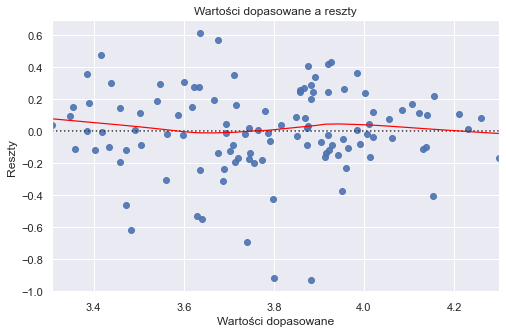

In [55]:
plt.rc('figure', figsize=(8,5))
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=m7.fittedvalues, y=m7.resid, data=dane,
                          lowess=True,
                          scatter_kws={'alpha': 0.9},
                          line_kws={'color': 'red', 'lw': 1.2, 'alpha': 1})

plot_lm_1.axes[0].set_title('Wartości dopasowane a reszty')
plot_lm_1.axes[0].set_xlabel('Wartości dopasowane')
plot_lm_1.axes[0].set_ylabel('Reszty');

Powyższy wykres przedstawia zależność między resztami a wartościamy dopasowanymi modelu. Na podstawie tego wykresu możemy podejrzewać, że w modelu występuje Homoskedastyczność (wariancja błędu losowego jest stała).



### 3.9 Wartości dzwigni, standaryzowanych reszta oraz odległości Cook'a.

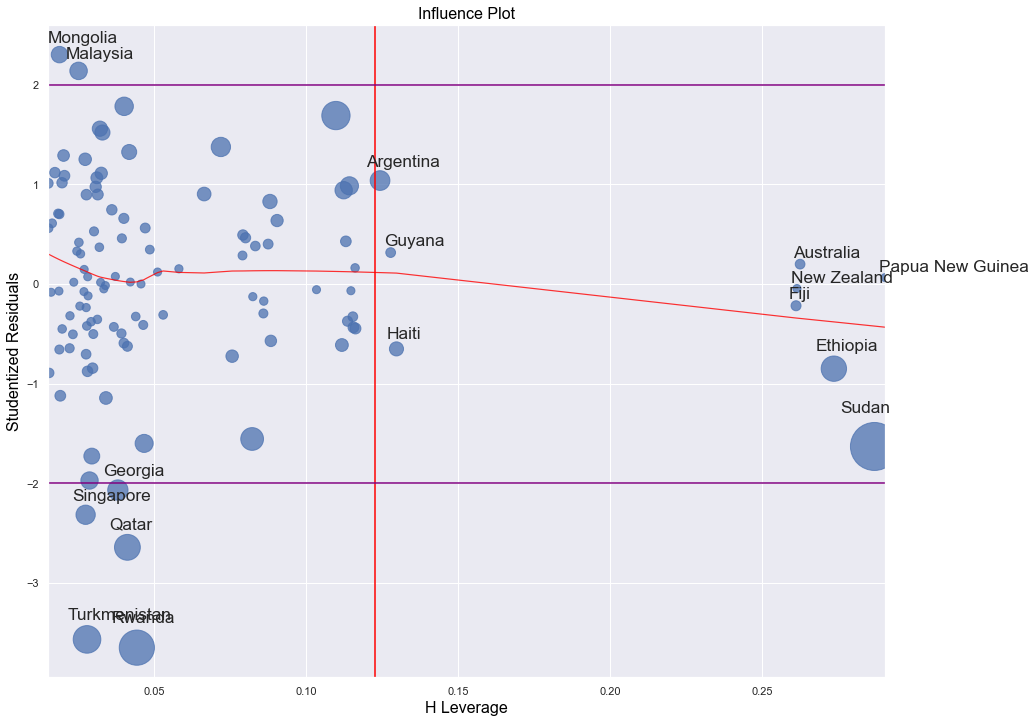

In [58]:
plt.rc('figure', figsize = (15,12))
sm.graphics.influence_plot(m7, criterion = 'Cooks')
sns.regplot(m7.get_influence().hat_matrix_diag, m7.get_influence().resid_studentized_internal,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1.2, 'alpha': 0.8})
plt.axvline(x=2*len(m7.params)/m7.nobs, color='red')
plt.axhline(y=2, color='purple')
plt.axhline(y=-2, color='purple')
show()

Na powyższym wykresie zostały przedstawione wartosci dzwigni oraz standaryzowanych reszt dla wszystkich obserwacji. Wielkość obserwacji zależy od odległości Cooka danej obserwacji. Powyżej górnej i poniżej dolnej fioletowej linii znajdują się obserwacje, które możemy uznać za nietypowe ze względu na wartość reszt. Na prawo od czerwonej pionowej linii znajdują się obserwacje nietypowe ze względu na wysoką wartość dźwigni. Czerwona linia w środku przedstawia linię trendu

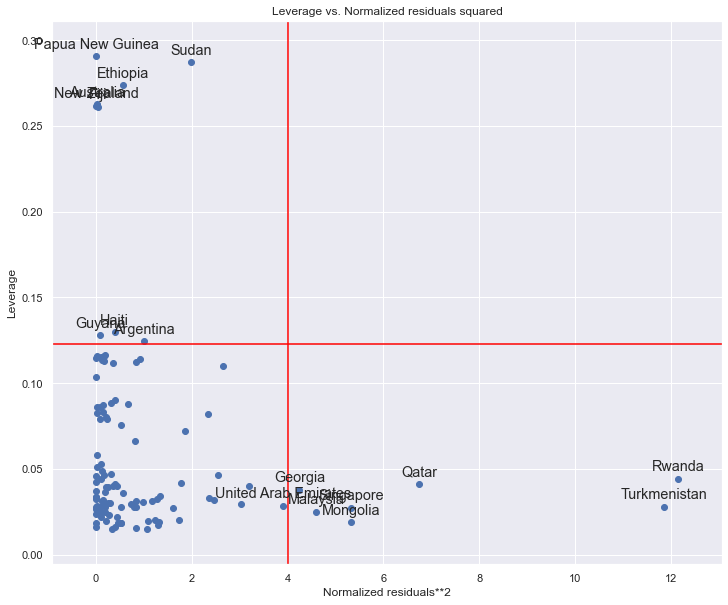

In [59]:
plt.rc('figure', figsize = (12,10))
sm.graphics.plot_leverage_resid2(m7)
plt.axvline(x=4, color='red')
plt.axhline(y=2*len(m7.params)/m7.nobs, color='red')
show()

Bazując no powyższych wykresach, za obserwacje nietypowe możemy uznać: Fiji, Australia, Nową Zelandia, Etiopia, Papua Nowa Gwinea, Argentyna, Gujana oraz Haiti, ponieważ mają wysokie wartości dźwigni.

Dodatkowo spośród tych nietypowych obserwacji możemy wybrać te, które nie pasują do naszej regresji, czyli te które mają wysoką wartość wystandaryzowanych reszt, a są nimi: Sudan, Etiopia i Argentyna.

W celu dokładniejszego zbadania obserwacji nietypowych oraz zbadania siły wpływu tych obserwacji przyjrzeliśmy się wartościom liczbowym dźwigni, wystandaryzowanych reszt i odległościom Cooka.

In [61]:
import statsmodels

In [63]:
x = statsmodels.stats.outliers_influence.OLSInfluence(m7)
a = x.summary_frame()
cook = a[['cooks_d', 'hat_diag', 'student_resid']].sort_values(by=['cooks_d'], ascending=False).head(10)
cook['Odległośći Cooka'] = cook.cooks_d
cook['Dźwignie'] = cook.hat_diag
cook['Standaryzowane reszty'] = cook.student_resid
cook.iloc[:,[3,4,5]]

,Odległośći Cooka,Dźwignie,Standaryzowane reszty
Country,,,
Sudan,0.150361,0.287066,-1.629224
Rwanda,0.078950,0.044274,-3.647106
South Africa,0.049470,0.109804,1.690008
Turkmenistan,0.046893,0.027866,-3.564279
Qatar,0.040510,0.041162,-2.640891
Ethiopia,0.038899,0.273705,-0.848916
Nicaragua,0.030505,0.082218,-1.554076
Georgia,0.023385,0.038021,-2.065937
Argentina,0.021835,0.124322,1.037959


Zgodnie z wykładem, celu wytypowania obserwacji nietypowych należy znaleźć takie, których dźwignia jest wyższa niż 0,149 dodatkowo moduł wystandaryzowanej reszty jest wyższy niż 2 oraz odległość Cooka wyższa niż 0,035.

Jednak żadna z naszych obserwacji nie spełnia tego warunku. Dlatego, w teorii nasz model nie powinien mieć problemów z obserwacjami nietypowymi. Pomimo to naszym zdaniem powinniśmy się przyjrzeć obserwacjom: Sudan i South Africa ze względu na zbliżone wartości do tych granicznych.